In [1]:
%%capture
cd ..

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from utils.unicode_utils import create_df_unicode, code_type, get_language, make_picture
from utils.complexity_metrics import *

In [3]:
df_unicode = create_df_unicode()

df_unicode

,code,note,rep
0,0020,SPACE,
1,0021,EXCLAMATION MARK,!
2,0022,QUOTATION MARK,""""
3,0023,NUMBER SIGN,#
4,0024,DOLLAR SIGN,$
...,...,...,...
34818,E01EB,VARIATION SELECTOR-252,󠇫
34819,E01EC,VARIATION SELECTOR-253,󠇬
34820,E01ED,VARIATION SELECTOR-254,󠇭
34821,E01EE,VARIATION SELECTOR-255,󠇮


In [4]:
dfu=df_unicode[df_unicode.code.apply(code_type)=='Writing Symbol'].reset_index(drop=True)
dfu['language'] = dfu.note.apply(get_language)
dfu.language.value_counts()            

ARABIC         1330
CUNEIFORM      1234
YI             1220
LATIN          1213
CJK            1165
               ... 
GROUP             1
UNCERTAINTY       1
NEPTUNE           1
BALLOT            1
SPACE             1
Name: language, Length: 819, dtype: int64

In [5]:
#for i in dfu.language.value_counts().index:
    #print(i)
    #print(' '.join([u(k) for k in dfu[dfu.language==i].code]))

In [6]:
' '.join(dfu[dfu.language=='MYANMAR'].rep)


'က ခ ဂ ဃ င စ ဆ ဇ ဈ ဉ ည ဋ ဌ ဍ ဎ ဏ တ ထ ဒ ဓ န ပ ဖ ဗ ဘ မ ယ ရ လ ဝ သ ဟ ဠ အ ဢ ဣ ဤ ဥ ဦ ဧ ဨ ဩ ဪ ါ ာ ိ ီ ု ူ ေ ဲ ဳ ဴ ဵ ံ ့ း ္ ် ျ ြ ွ ှ ဿ ၀ ၁ ၂ ၃ ၄ ၅ ၆ ၇ ၈ ၉ ၊ ။ ၌ ၍ ၎ ၏ ၐ ၑ ၒ ၓ ၔ ၕ ၖ ၗ ၘ ၙ ၚ ၛ ၜ ၝ ၞ ၟ ၠ ၡ ၢ ၣ ၤ ၥ ၦ ၧ ၨ ၩ ၪ ၫ ၬ ၭ ၮ ၯ ၰ ၱ ၲ ၳ ၴ ၵ ၶ ၷ ၸ ၹ ၺ ၻ ၼ ၽ ၾ ၿ ႀ ႁ ႂ ႃ ႄ ႅ ႆ ႇ ႈ ႉ ႊ ႋ ႌ ႍ ႎ ႏ ႐ ႑ ႒ ႓ ႔ ႕ ႖ ႗ ႘ ႙ ႚ ႛ ႜ ႝ ႞ ႟ ꧠ ꧡ ꧢ ꧣ ꧤ ꧥ ꧦ ꧧ ꧨ ꧩ ꧪ ꧫ ꧬ ꧭ ꧮ ꧯ ꧰ ꧱ ꧲ ꧳ ꧴ ꧵ ꧶ ꧷ ꧸ ꧹ ꧺ ꧻ ꧼ ꧽ ꧾ ꩠ ꩡ ꩢ ꩣ ꩤ ꩥ ꩦ ꩧ ꩨ ꩩ ꩪ ꩫ ꩬ ꩭ ꩮ ꩯ ꩰ ꩱ ꩲ ꩳ ꩴ ꩵ ꩶ ꩷ ꩸ ꩹ ꩺ ꩻ ꩼ ꩽ ꩾ ꩿ'

0               (1.0, 1.0)
1      (0.98088, 0.991432)
2     (0.986672, 0.986672)
3     (0.946056, 0.962696)
4     (0.947248, 0.967336)
              ...         
95              (1.0, 1.0)
96    (0.980648, 0.982312)
97       (0.96756, 0.9736)
98    (0.955656, 0.967352)
99     (0.967808, 0.97736)
Name: picture, Length: 100, dtype: object


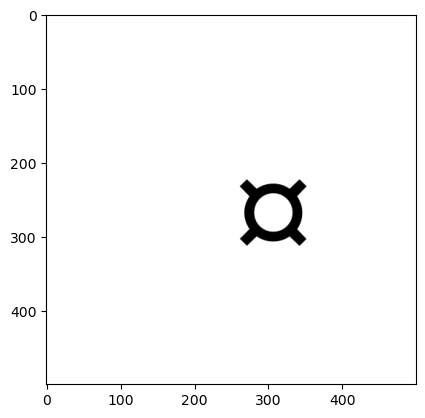

CPU times: user 10.4 s, sys: 79.6 ms, total: 10.5 s
Wall time: 10.6 s


In [7]:
%%time

#this code prints the symmetry ratios(left-to-right, top-to-bottom) for the first 100 characters in the dfu df, and the 100th character's pic

sub_df = dfu.head(100).copy()
sub_df['picture'] = sub_df.code.apply(lambda x: make_picture(x, 'data/ttfs/NotoSans-Regular.ttf'))

symmetry = sub_df.picture.apply(check_symmetry)
print(symmetry)

if len(sub_df) > 99:
    plt.imshow(sub_df.iloc[99].picture, cmap='gray')
    plt.show()
else:
    print('invalid index')


In [8]:
"""

#this code is for the whole dataframe. it takes a long time to run, so I commented it out.

%%time

dfu['picture'] = dfu.code.apply(lambda x: make_picture(x, 'data/ttfs/NotoSans-Regular.ttf'))


symmetry = dfu.picture.apply(check_symmetry)
print(symmetry)
if len(dfu)>0:

    plt.imshow(dfu.iloc[0].picture, cmap='gray')
    plt.show()
else:
    print('invalid index')
"""

"\n\n#this code is for the whole dataframe. it takes a long time to run, so I commented it out.\n\n%%time\n\ndfu['picture'] = dfu.code.apply(lambda x: make_picture(x, 'data/ttfs/NotoSans-Regular.ttf'))\n\n\nsymmetry = dfu.picture.apply(check_symmetry)\nprint(symmetry)\nif len(dfu)>0:\n\n    plt.imshow(dfu.iloc[0].picture, cmap='gray')\n    plt.show()\nelse:\n    print('invalid index')\n"

In [9]:
sub_df['pixel_count_complexity'] = sub_df.picture.apply(pixel_count_complexity)

'   '.join(sub_df.sort_values('pixel_count_complexity', ascending=True).rep.iloc[:100].values)


'M   W   @   %   &   Q   B   N   m   O   D   g   w   G   R   8   H   #   $   p   q   d   b   K   U   0   A   9   6   E   P   Z   £   h   4   X   5   3   S   V   k   e   2   y   a   C   o   u   F   n   Y   T   x   7   ¢   ]   [   s   ¤   v   f   {   }   J   z   L   I   j   c   t   *   ?   )   (   1   |   l   =   r   >   <   +   ^   \\   /   i   ¡   !   "   ~   ;   _   :   ,   \'   -   `   .   \xa0    '

In [10]:
"""

#this code is for the whole dataframe. 

dfu['pixel_count_complexity'] = dfu.picture.apply(pixel_count_complexity)

'   '.join(dfu.sort_values('pixel_count_complexity',ascending=True).rep.iloc[:100].values)
"""

"\n\n#this code is for the whole dataframe. \n\ndfu['pixel_count_complexity'] = dfu.picture.apply(pixel_count_complexity)\n\n'   '.join(dfu.sort_values('pixel_count_complexity',ascending=True).rep.iloc[:100].values)\n"

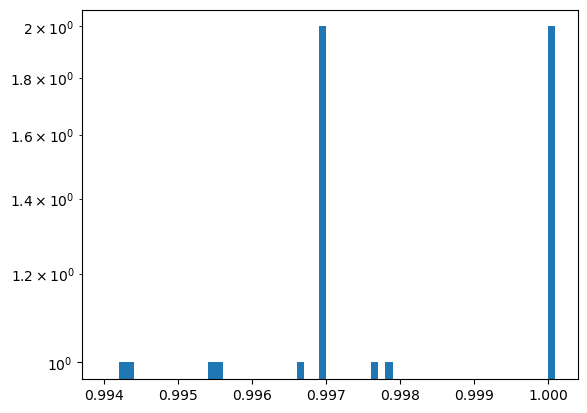

In [11]:
plt.hist(sub_df.pixel_count_complexity,
        bins=np.arange(.994,1.0002,.0001))
plt.yscale('log')
plt.show()

In [12]:
"""
#this code is for the whole dataframe.

plt.hist(dfu.pixel_count_complexity,
        bins=np.arange(.994,1.0002,.0001))
plt.yscale('log')
plt.show()
"""

"\n#this code is for the whole dataframe.\n\nplt.hist(dfu.pixel_count_complexity,\n        bins=np.arange(.994,1.0002,.0001))\nplt.yscale('log')\nplt.show()\n"